In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import mixture
from scipy.stats import norm
import math
import statistics as stat
import random as rd
from numpy import quantile, where , random
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.ensemble import IsolationForest

In [59]:
n=400
X0, y0=datasets.make_moons(n_samples=n, noise=0.05)

In [37]:
#addign 10% of uniform distributed sequence
y=np.random.uniform(-0.5,1.25, size=40)
x=np.random.uniform(-1,2, size=40)
noise=[x,y]
noise=np.transpose(noise)
X0_noise=np.concatenate((X0,noise),axis=0)

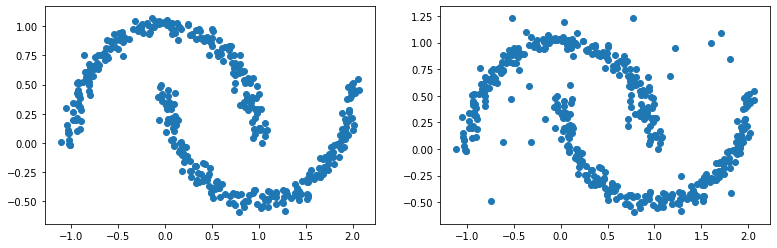

In [38]:
figure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,2,1);
ax.scatter(X0[:,0],X0[:,1])
ax=plt.subplot(1,2,2);
ax.scatter(X0_noise[:,0],X0_noise[:,1])


In [39]:
NG1=200;
mx1G1=0;
mx2G1=0;
sx1G1=1;
sx2G1=1;
rhoxG1=0.95;
mu1=[mx1G1, mx2G1];
covxG1=[[sx1G1**2, rhoxG1*sx1G1*sx2G1], [rhoxG1*sx1G1*sx2G1, sx1G1**2]];
XG1=np.random.multivariate_normal(mu1,covxG1,NG1);
X01=preprocessing.scale(XG1);
X01

array([[-2.28477778e+00, -2.10007199e+00],
       [-2.16396700e+00, -1.93887609e+00],
       [ 1.20252864e+00,  8.87986629e-01],
       [ 9.85711003e-01,  1.21778640e+00],
       [-3.07314429e-01, -1.73533308e-01],
       [ 5.99804012e-02, -2.71398176e-01],
       [ 1.03270543e-01,  2.23916158e-03],
       [-1.02634583e+00, -1.35079097e+00],
       [-3.76651423e-02,  5.19269120e-01],
       [-2.47635147e-01,  4.71607144e-02],
       [-2.09330084e-01, -1.50467207e-01],
       [ 1.13360766e+00,  9.36230542e-01],
       [ 3.38716407e-01, -6.43799286e-02],
       [ 7.23548485e-01,  2.96388912e-01],
       [ 4.06233043e-01,  3.42682870e-01],
       [-1.00602068e+00, -1.23481687e+00],
       [ 1.06075809e+00,  1.16204800e+00],
       [ 9.63747519e-02,  1.16690020e-01],
       [ 1.43929975e+00,  1.68328406e+00],
       [ 1.71824208e+00,  2.23450001e+00],
       [-5.52486859e-01, -1.03368125e+00],
       [ 1.72532862e+00,  1.50414323e+00],
       [ 1.30059402e+00,  7.99281971e-02],
       [ 6.

In [40]:
#addign 10% of uniform distributed sequence
y=np.random.uniform(-3,3, size=20)
x=np.random.uniform(-3,3, size=20)
noise=[x,y]
noise=np.transpose(noise)
X0_noise1=np.concatenate((X01,noise),axis=0)

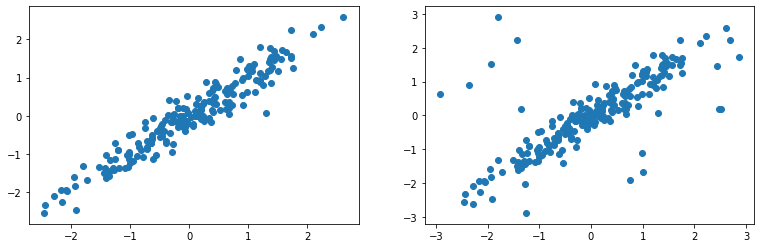

In [42]:
figure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,2,1);
ax.scatter(X01[:,0],X01[:,1])
ax=plt.subplot(1,2,2);
ax.scatter(X0_noise1[:,0],X0_noise1[:,1])

In [34]:
#isolation forest 

In [84]:
iforest=IsolationForest(n_estimators=100)
iforest.fit(X0_noise)
scores=iforest.score_samples(X0_noise)

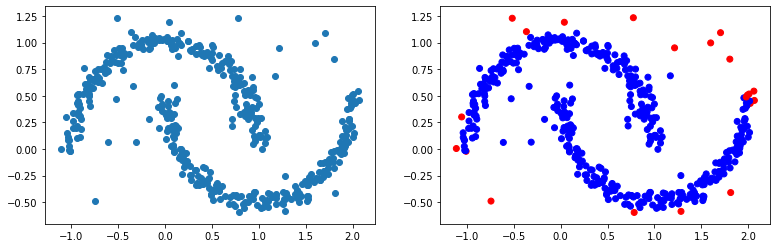

In [94]:
igure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,2,1);
ax.scatter(X0_noise[:,0],X0_noise[:,1])
color = ['blue' if y>quantile(X0_noise,0.078) else 'red' for y in scores]
ax=plt.subplot(1,2,2);
ax.scatter(X0_noise[:,0],X0_noise[:,1],c=color)

In [68]:
iforest=IsolationForest(n_estimators=100)
iforest.fit(X0_noise1)
scores=iforest.score_samples(X0_noise1)

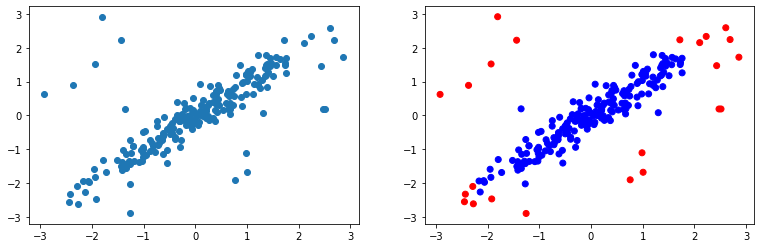

In [82]:
figure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,2,1);
ax.scatter(X0_noise1[:,0],X0_noise1[:,1])
color = ['blue' if y>quantile(X0_noise1,0.288) else 'red' for y in scores]
ax=plt.subplot(1,2,2);
ax.scatter(X0_noise1[:,0],X0_noise1[:,1],c=color)

In [ ]:
#local outlier factor

In [101]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=20, contamination=.01,novelty='TRUE')
lof.fit(X0_noise)

scores=lof.score_samples(X0_noise)
figure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,2,1);
ax.scatter(X0_noise[:,0],X0_noise[:,1])
color = ['blue' if y!=-1 else 'red' for y in scores]
ax=plt.subplot(1,2,2);
ax.scatter(X0_noise[:,0],X0_noise[:,1],c=color)

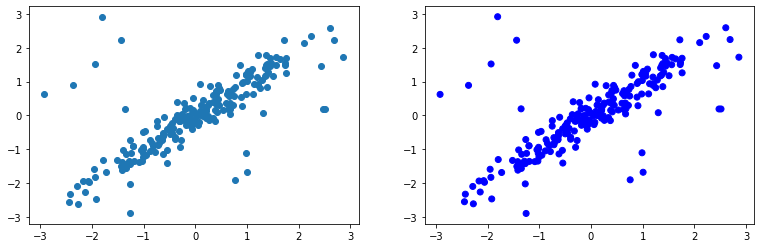

In [103]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=20, contamination=.01,novelty='TRUE')
lof.fit(X0_noise)

scores=lof.score_samples(X0_noise1)
figure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,2,1);
ax.scatter(X0_noise1[:,0],X0_noise1[:,1])
color = ['blue' if y!=-1 else 'red' for y in scores]
ax=plt.subplot(1,2,2);
ax.scatter(X0_noise1[:,0],X0_noise1[:,1],c=color)

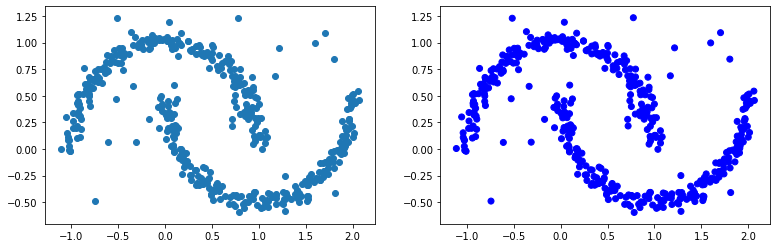

In [106]:
# Density based Anomaly detection
from sklearn.covariance import EllipticEnvelope
mod=EllipticEnvelope(contamination=0.05);
mod.fit(X0_noise)
scores=mod.score_samples(X0_noise)
figure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,2,1);
ax.scatter(X0_noise[:,0],X0_noise[:,1])
color = ['blue' if y!=-1 else 'red' for y in scores]
ax=plt.subplot(1,2,2);
ax.scatter(X0_noise[:,0],X0_noise[:,1],c=color)

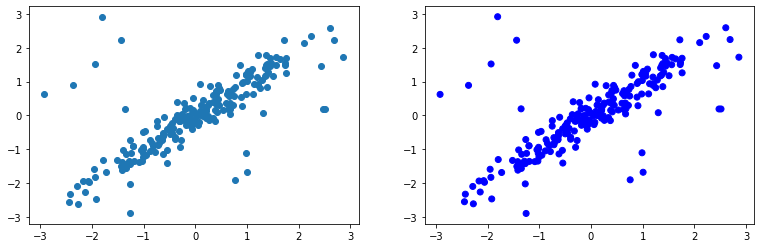

In [107]:
# Density based Anomaly detection
from sklearn.covariance import EllipticEnvelope
mod=EllipticEnvelope(contamination=0.05);
mod.fit(X0_noise1)
scores=mod.score_samples(X0_noise1)
figure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,2,1);
ax.scatter(X0_noise1[:,0],X0_noise1[:,1])
color = ['blue' if y!=-1 else 'red' for y in scores]
ax=plt.subplot(1,2,2);
ax.scatter(X0_noise1[:,0],X0_noise1[:,1],c=color)

In [108]:
scores

array([-5.23894228e+00, -4.87294046e+00, -2.41915566e+00, -1.74244194e+00,
       -2.70891354e-01, -1.27640173e+00, -1.27475709e-01, -2.40682296e+00,
       -3.61627050e+00, -1.03056318e+00, -7.05889626e-02, -1.63999409e+00,
       -1.94857500e+00, -2.50618345e+00, -2.09825661e-01, -1.69471299e+00,
       -1.32188458e+00, -1.87085258e-02, -2.97221345e+00, -6.55269051e+00,
       -3.12521023e+00, -3.35875832e+00, -1.82707958e+01, -2.95904672e+00,
       -1.04135955e+00, -4.70209483e-01, -2.46815037e+00, -5.04681713e+00,
       -9.78242678e-01, -1.57907265e+00, -9.88110273e-01, -2.12715866e+00,
       -1.64763866e-01, -2.36870829e-01, -2.15328902e+00, -2.00209540e+00,
       -9.35348137e-01, -2.85144186e+00, -2.46442557e+00, -9.12236165e-01,
       -1.75123393e+00, -5.80286837e-01, -3.63763445e+00, -4.51285337e-01,
       -1.13828296e+00, -1.63396320e-01, -4.96971535e-01, -5.54250219e-01,
       -3.69101085e-01, -3.18352758e+00, -1.13161398e-01, -9.96115831e-01,
       -2.18415198e-01, -